In [8]:
# Import necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
# clone the dataset from github repo

! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 12.15 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [10]:
main_dir="/content/datasets/Data"

In [23]:
class get_data:
    def __init__(self, main_dir):
        self.main_dir = main_dir

    def open_dir(self):
        #set the path to the train dir
        self.train_dir=os.path.join(self.main_dir,'train')

        #set the path to the test dir
        self.test_dir=os.path.join(self.main_dir,'test')


        #directory with the training covid images
        self.train_covid_dir=os.path.join(self.train_dir,'COVID19')

        #directory with the training normal images
        self.train_normal_dir=os.path.join(self.train_dir,'NORMAL')

        #directory with the testing covid images
        self.test_covid_dir=os.path.join(self.test_dir,'COVID19')
        #directory with the testing normal images
        self.test_normal_dir=os.path.join(self.test_dir,'NORMAL')

        return self.train_dir, self.test_dir, self.train_covid_dir, self.train_normal_dir, self.test_covid_dir, self.test_normal_dir

In [24]:
class data_augmentation(get_data):
    def __init__(self, main_dir):
        self.main_dir=main_dir
    def data_aug(self):
        self.open_dir()
        self.dgen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
        self.dgen_validation = ImageDataGenerator(rescale=1./255)
        self.dgen_test = ImageDataGenerator(rescale=1./255)

        self.train_generator = self.dgen_train.flow_from_directory(self.train_dir,
                                                                   target_size=(
                                                                       150, 150),
                                                                   subset='training',
                                                                   batch_size=32,
                                                                   class_mode='binary')
        self.validation_generator = self.dgen_train.flow_from_directory(self.train_dir,
                                                                        target_size=(
                                                                            150, 150),
                                                                        subset='validation',
                                                                        batch_size=32,
                                                                        class_mode='binary')
        self.test_generator = self.dgen_test.flow_from_directory(self.test_dir,
                                                                 target_size=(
                                                                     150, 150),
                                                                 batch_size=32,
                                                                 class_mode='binary')

In [25]:
class Model(data_augmentation):
    def __init__(self,main_dir):
        self.main_dir=main_dir
        

    def create_model(self):
        self.data_aug()
        self.model=Sequential()
        # add the convolutional layer
        # filters, size of filters,padding,activation_function,input_shape
        self.model.add(Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(150,150,3)))
        # pooling layer
        self.model.add(MaxPooling2D(pool_size=(2,2)))
        # place a dropout layer
        self.model.add(Dropout(0.5))
        # add another convolutional layer
        self.model.add(Conv2D(64,(5,5),padding='same',activation='relu'))
        # pooling layer
        self.model.add(MaxPooling2D(pool_size=(2,2)))
        # place a dropout layer
        self.model.add(Dropout(0.5))
        # Flatten layer
        self.model.add(Flatten())
        # add a dense layer : amount of nodes, activation
        self.model.add(Dense(256,activation='relu'))
        # place a dropout layer
        # 0.5 drop out rate is recommended, half input nodes will be dropped at each update
        self.model.add(Dropout(0.5))
        self.model.add(Dense(1,activation='sigmoid'))
        self.model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
        self.history=self.model.fit(self.train_generator,epochs=5,validation_data=self.validation_generator)
        return self.history
        


In [26]:
class Performance_Evaluation(Model):
    def __init__(self,main_dir):
        self.main_dir=main_dir
        

    def training_and_evaluation_loss(self):
        self.create_model()
        #plot graph between training and validation loss
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.legend(['Training','Validation'])
        plt.title('Training and validation loss')
        plt.show()

    def training_and_evaluation_accuracy(self):
        self.create_model()

        #plot graph between training and valiadation accuarcy
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.legend(['Training','Validation'])
        plt.title('Training and validation accuracy')
        plt.show()


In [29]:
class Model_Evaluation(Model):
    def __init__(self,main_dir):
        self.main_dir=main_dir

    def model_testing(self):
        self.data_aug()
        self.create_model()

        # get the test acuarcy and loss
        test_loss, test_acc=self.model.evaluate(self.test_generator)
        print('test loss : {} test acc : {}'.format(test_loss,test_acc))


In [30]:
# Model training
df=Model(main_dir)
print(df.create_model())

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
46/46 [==============================] - 56s 1s/step - loss: 0.9543 - accuracy: 0.7674 - val_loss: 0.3083 - val_accuracy: 0.9227
Epoch 2/5
46/46 [==============================] - 54s 1s/step - loss: 0.2283 - accuracy: 0.9137 - val_loss: 0.3542 - val_accuracy: 0.9199
Epoch 3/5
46/46 [==============================] - 54s 1s/step - loss: 0.1689 - accuracy: 0.9469 - val_loss: 0.4074 - val_accuracy: 0.8536
Epoch 4/5
46/46 [==============================] - 54s 1s/step - loss: 0.1532 - accuracy: 0.9482 - val_loss: 0.1719 - val_accuracy: 0.9503
Epoch 5/5
46/46 [==============================] - 54s 1s/step - loss: 0.1444 - accuracy: 0.9503 - val_loss: 0.1652 - val_accuracy: 0.9586


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
46/46 [==============================] - 56s 1s/step - loss: 0.6846 - accuracy: 0.7778 - val_loss: 0.3843 - val_accuracy: 0.8950
Epoch 2/5
46/46 [==============================] - 54s 1s/step - loss: 0.2284 - accuracy: 0.9213 - val_loss: 0.1803 - val_accuracy: 0.9475
Epoch 3/5
46/46 [==============================] - 54s 1s/step - loss: 0.1826 - accuracy: 0.9303 - val_loss: 0.1618 - val_accuracy: 0.9503
Epoch 4/5
46/46 [==============================] - 53s 1s/step - loss: 0.1495 - accuracy: 0.9510 - val_loss: 0.1178 - val_accuracy: 0.9641
Epoch 5/5
46/46 [==============================] - 53s 1s/step - loss: 0.1456 - accuracy: 0.9503 - val_loss: 0.1366 - val_accuracy: 0.9613


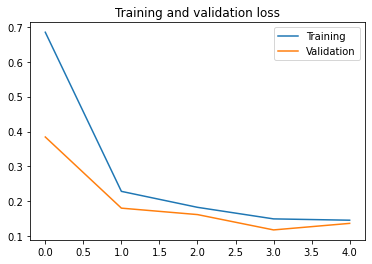

None
Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.
Epoch 1/5
46/46 [==============================] - 55s 1s/step - loss: 1.2260 - accuracy: 0.7288 - val_loss: 0.4187 - val_accuracy: 0.8177
Epoch 2/5
46/46 [==============================] - 54s 1s/step - loss: 0.3285 - accuracy: 0.8654 - val_loss: 0.3189 - val_accuracy: 0.8867
Epoch 3/5
46/46 [==============================] - 54s 1s/step - loss: 0.2364 - accuracy: 0.9124 - val_loss: 0.2220 - val_accuracy: 0.9116
Epoch 4/5
46/46 [==============================] - 53s 1s/step - loss: 0.2120 - accuracy: 0.9158 - val_loss: 0.1278 - val_accuracy: 0.9586
Epoch 5/5
46/46 [==============================] - 53s 1s/step - loss: 0.1725 - accuracy: 0.9324 - val_loss: 0.1993 - val_accuracy: 0.9171


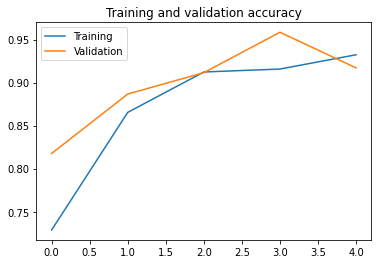

None


In [31]:
# Training loss and accuracy
d=Performance_Evaluation(main_dir)
print(d.training_and_evaluation_loss())
print(d.training_and_evaluation_accuracy())

In [32]:
# Model evaluation
d=Model_Evaluation(main_dir)
print(d.model_testing())

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.
Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
46/46 [==============================] - 55s 1s/step - loss: 1.1648 - accuracy: 0.7350 - val_loss: 0.3509 - val_accuracy: 0.8453
Epoch 2/5
46/46 [==============================] - 55s 1s/step - loss: 0.3253 - accuracy: 0.8523 - val_loss: 0.2718 - val_accuracy: 0.8840
Epoch 3/5
46/46 [==============================] - 55s 1s/step - loss: 0.2027 - accuracy: 0.9234 - val_loss: 0.1613 - val_accuracy: 0.9503
Epoch 4/5
46/46 [==============================] - 54s 1s/step - loss: 0.1960 - accuracy: 0.9324 - val_loss: 0.2706 - val_accuracy: 0.8950
Epoch 5/5
16/16 [==============================] - 12s 709ms/step - loss: 0.2035 - accuracy: 0.9194
test loss : 0.20346878468990326 test acc : 0.9194214940071106
None
